# Phishing URL Detection 

The Internet has become an indispensable part of
our life, However, It also has provided opportunities to anonymously perform malicious activities like Phishing. Phishers try to deceive their victims by social engineering or creating mockup websites to steal information such as account ID, username, password from individuals and organizations. Although many methods have been proposed to detect phishing websites, Phishers have evolved their methods to escape from these detection methods. One of the most successful methods for detecting these malicious activities is Machine Learning. This is because most Phishing attacks have some common characteristics which can be identified by machine learning methods.

The steps demonstrated in this notebook are:

1. Loading the data
2. Data Exploration & EDA
3. Visualizing the data
4. Splitting the data
5. Training the data
6. Comparision of Model
7. Conclusion

In [44]:
# import libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

## 1. Loading Data:

The dataset is borrowed from Kaggle, https://www.kaggle.com/eswarchandt/phishing-website-detector .

A collection of website URLs for 11000+ websites. Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).


The overview of this dataset is, it has 11054 samples with 32 features. Download the dataset from the link provided.

In [45]:
df = pd.read_csv("phishing.csv")
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


## 2. Data Exploration & EDA:
In this step, few dataframe methods are used to look into the data and its features.

In [46]:
# shape of dataset 

df.shape

(11054, 32)

In [47]:
# list the features 

df.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [48]:
# Information about dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [49]:
# Check unique values 

df.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [50]:
# Drop index column 

df = df.drop(['Index'] , axis = 1 )

In [51]:
# Statistical Summary 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


OBSERVATIONS:
1. There are 11054 instances and 31 fearures in dataset.
2. Out of which 30 are independent features where as 1 is dependent feature.
3. Each feature is in int datatype, so there is no need to use LabelEncoder.
4. There is no outlier present in dataset.
5. There is no missing value in dataset.

## 3. Visualizing the data:
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

[]

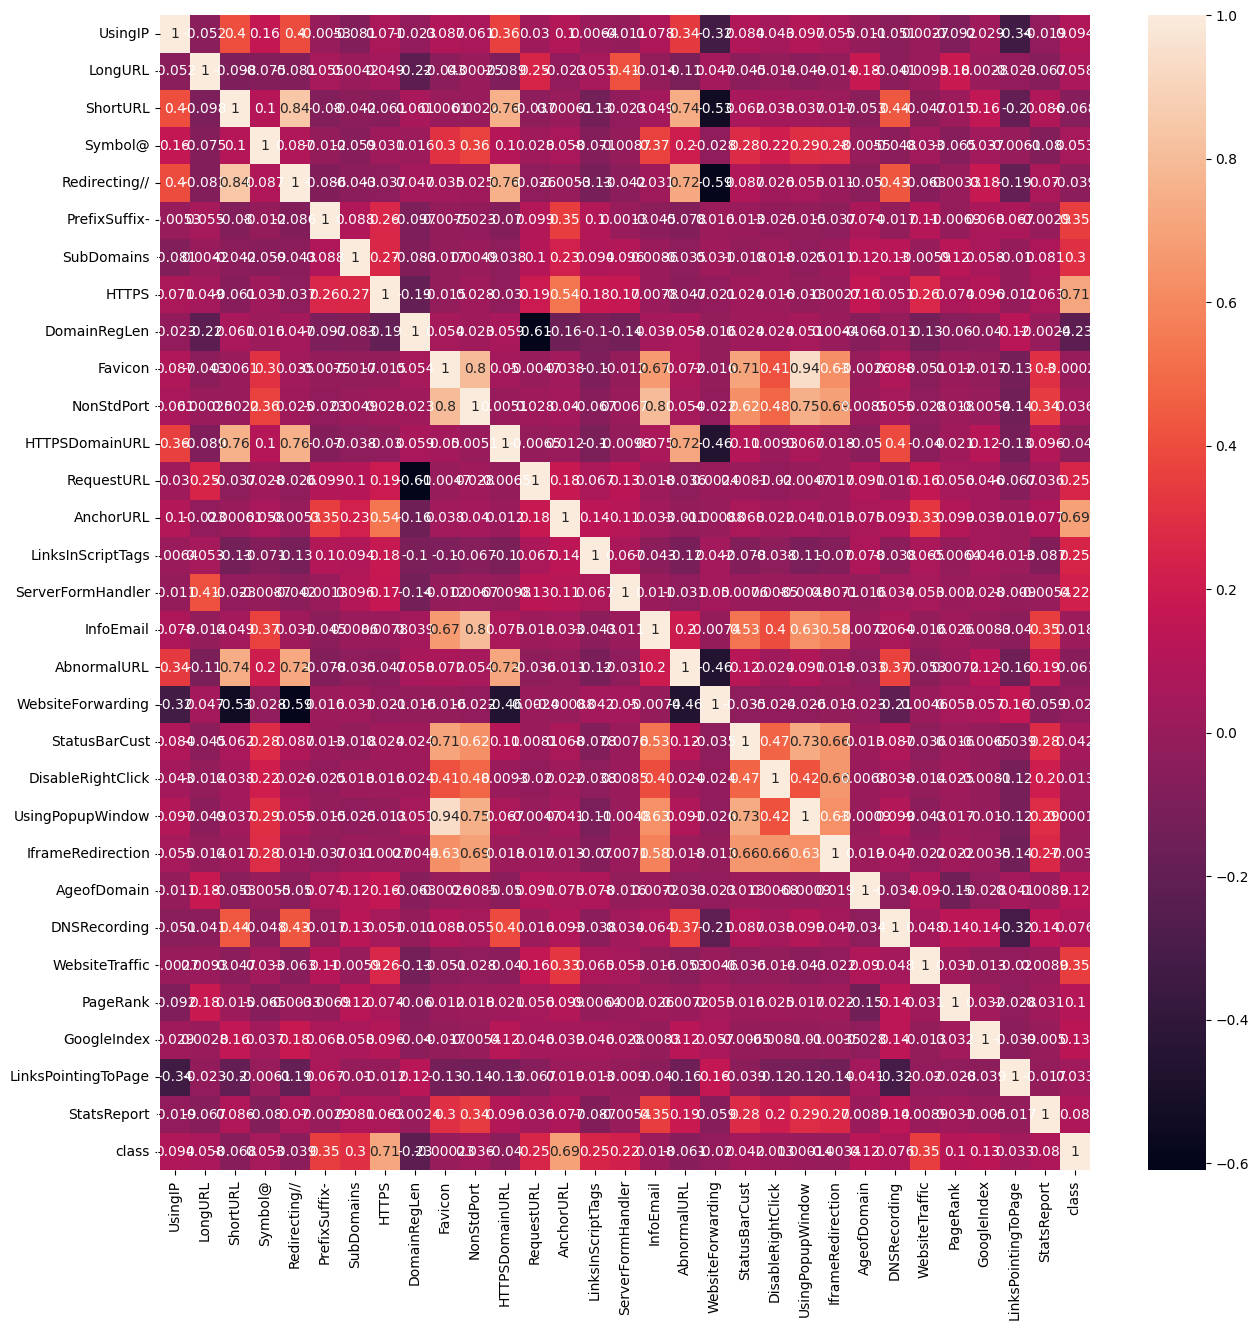

In [52]:
# Correlation 

plt.figure(figsize=(15,15))
sns.heatmap(df.corr() , annot=True )
plt.plot()

Text(0.5, 1.0, 'Phishing Count')

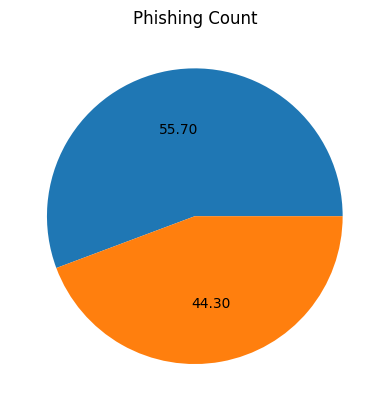

In [53]:
# Phishing Count in pie chart

plt.pie(df['class'].value_counts() , autopct="%.2f")
plt.title("Phishing Count")


## 4. Splitting the Data:
The data is split into train & test sets, 80-20 split.

In [54]:
# Split data into dependent and independent feature 

X = df.drop(['class'] , axis= 1)
y = df['class']

In [55]:
X

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
3,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,1,-1,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,-1,1,1,-1,-1,1,1,1
11050,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,1,-1,1,1,1,1,1,1,-1,1
11051,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,1,-1,1,0,1
11052,-1,-1,1,1,1,-1,-1,-1,1,-1,...,1,-1,1,1,1,1,-1,1,1,1


In [56]:
y

0       -1
1       -1
2       -1
3        1
4        1
        ..
11049    1
11050   -1
11051   -1
11052   -1
11053   -1
Name: class, Length: 11054, dtype: int64

In [57]:
# Split  data into train and test part 

from sklearn.model_selection import train_test_split 

X_train , X_test , y_train , y_test = train_test_split(X, y,  test_size=0.2 , random_state= 42)

In [58]:
X_train.shape , X_test.shape

((8843, 30), (2211, 30))

## 5. Model Building & Training:

1. Logistic Regression
2. k-Nearest Neighbors 
3. Support Vector Clasifier
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boosting
8. Multilayer Perceptrons

## 5.1. Logistic Regression



Accuracy :  0.9335142469470827
[[ 887   58]
 [  89 1177]]
              precision    recall  f1-score   support

          -1       0.91      0.94      0.92       945
           1       0.95      0.93      0.94      1266

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



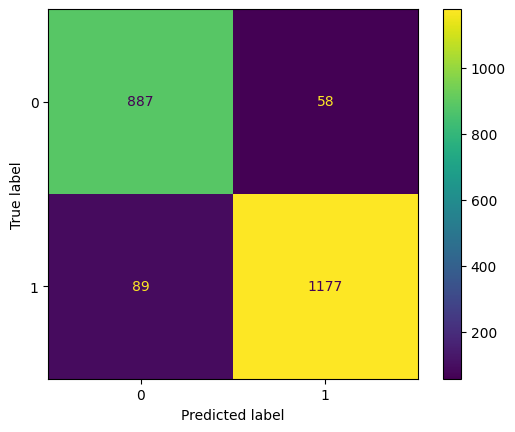

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , ConfusionMatrixDisplay

log = LogisticRegression()

log.fit(X_train , y_train)

y_pred_log = log.predict(X_test)

print("Accuracy : " , accuracy_score(y_pred_log , y_test))
print(confusion_matrix(y_pred_log , y_test))
print(classification_report(y_pred_log , y_test))

cm = ConfusionMatrixDisplay(confusion_matrix(y_pred_log , y_test))
cm.plot()



## 5.2. K-Nearest Neighbors : Classifier


Accuracy :  0.9561284486657621
[[ 926   47]
 [  50 1188]]
              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       973
           1       0.96      0.96      0.96      1238

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



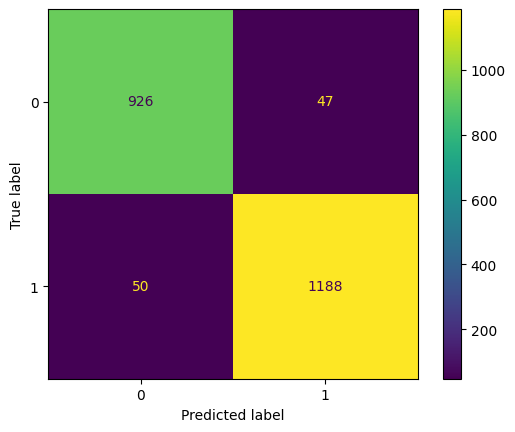

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train , y_train )

y_pred_knn = knn.predict(X_test)

print("Accuracy : " , accuracy_score(y_pred_knn , y_test))
print(confusion_matrix(y_pred_knn , y_test))
print(classification_report(y_pred_knn , y_test))

cm = ConfusionMatrixDisplay(confusion_matrix(y_pred_knn , y_test))
cm.plot()

## 5.3. Support Vector Machine : Classifier


Accuracy :  0.9642695612844867
[[ 922   25]
 [  54 1210]]
              precision    recall  f1-score   support

          -1       0.94      0.97      0.96       947
           1       0.98      0.96      0.97      1264

    accuracy                           0.96      2211
   macro avg       0.96      0.97      0.96      2211
weighted avg       0.96      0.96      0.96      2211



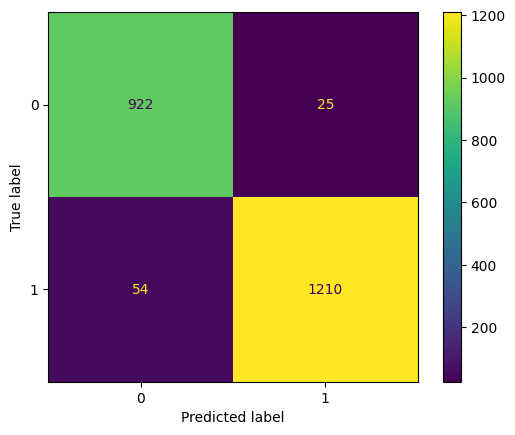

In [61]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

print("Accuracy : " , accuracy_score(y_pred_svc , y_test))
print(confusion_matrix(y_pred_svc , y_test))
print(classification_report(y_pred_svc , y_test))

cm = ConfusionMatrixDisplay(confusion_matrix(y_pred_svc , y_test))
cm.plot()

## 5.4. Naive Bayes : Classifier


Accuracy :  0.6047037539574853
[[974 872]
 [  2 363]]
              precision    recall  f1-score   support

          -1       1.00      0.53      0.69      1846
           1       0.29      0.99      0.45       365

    accuracy                           0.60      2211
   macro avg       0.65      0.76      0.57      2211
weighted avg       0.88      0.60      0.65      2211



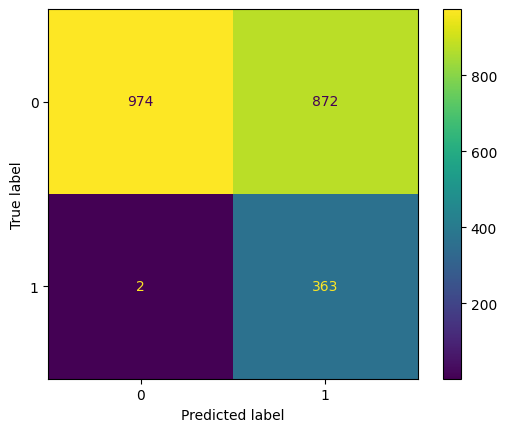

In [62]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train , y_train)

y_pred_nb = nb.predict(X_test)

print("Accuracy : " , accuracy_score(y_pred_nb , y_test))
print(confusion_matrix(y_pred_nb , y_test))
print(classification_report(y_pred_nb , y_test))

cm = ConfusionMatrixDisplay(confusion_matrix(y_pred_nb , y_test))
cm.plot()


## 5.5. Decision Trees : Classifier


Accuracy :  0.9574853007688828
[[ 930   48]
 [  46 1187]]
              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       978
           1       0.96      0.96      0.96      1233

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



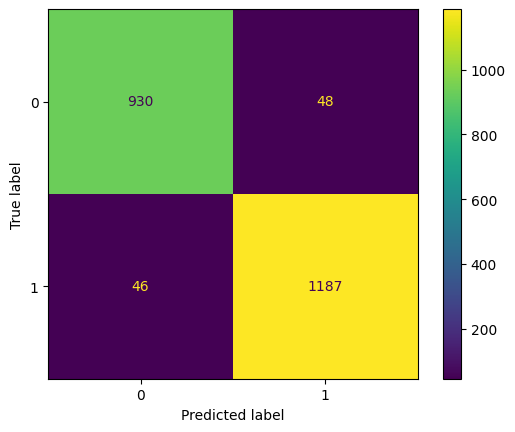

In [63]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth= 30 )

tree.fit(X_train , y_train)

y_pred_tree = tree.predict(X_test)

print("Accuracy : " , accuracy_score(y_pred_tree , y_test))
print(confusion_matrix(y_pred_tree , y_test))
print(classification_report(y_pred_tree , y_test))

cm = ConfusionMatrixDisplay(confusion_matrix(y_pred_tree , y_test))
cm.plot()

## 5.6. Random Forest : Classifier


Accuracy :  0.9696969696969697
[[ 935   26]
 [  41 1209]]
              precision    recall  f1-score   support

          -1       0.96      0.97      0.97       961
           1       0.98      0.97      0.97      1250

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



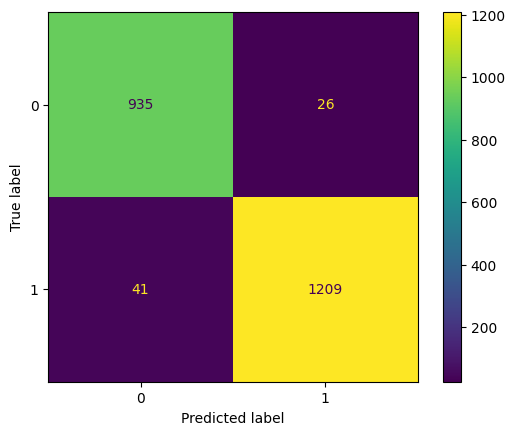

In [64]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10)

forest.fit(X_train , y_train)

y_pred_forest = forest.predict(X_test)

print("Accuracy : " , accuracy_score(y_pred_forest , y_test))
print(confusion_matrix(y_pred_forest , y_test))
print(classification_report(y_pred_forest , y_test))

cm = ConfusionMatrixDisplay(confusion_matrix(y_pred_forest , y_test))
cm.plot()


## 5.7.Gradient Boosting Classifier


Accuracy :  0.9742198100407056
[[ 933   14]
 [  43 1221]]
              precision    recall  f1-score   support

          -1       0.96      0.99      0.97       947
           1       0.99      0.97      0.98      1264

    accuracy                           0.97      2211
   macro avg       0.97      0.98      0.97      2211
weighted avg       0.97      0.97      0.97      2211



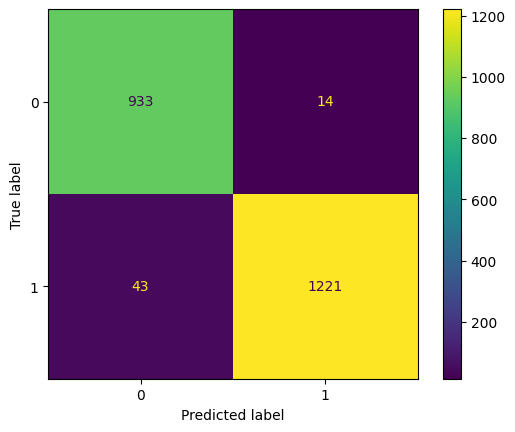

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

para = {'max_depth':[2,3,4],'learning_rate':[0.5,0.6,0.7]}

gbc =  GridSearchCV(GradientBoostingClassifier() , param_grid= para)

gbc.fit(X_train , y_train)

y_pred_gbc = gbc.predict(X_test)

print("Accuracy : " , accuracy_score(y_pred_gbc , y_test))
print(confusion_matrix(y_pred_gbc , y_test))
print(classification_report(y_pred_gbc , y_test))

cm = ConfusionMatrixDisplay(confusion_matrix(y_pred_gbc , y_test))
cm.plot()

## 5.8. Multi-layer Perceptron classifier


Accuracy :  0.9696969696969697
[[ 935   26]
 [  41 1209]]
              precision    recall  f1-score   support

          -1       0.96      0.97      0.97       961
           1       0.98      0.97      0.97      1250

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



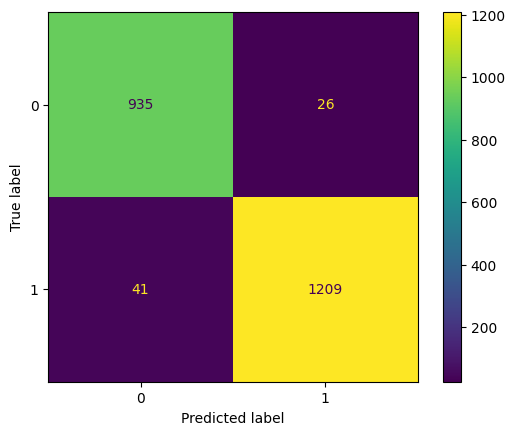

In [68]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

mlp.fit(X_train , y_train)

y_pred_mlp = mlp.predict(X_test)

print("Accuracy : " , accuracy_score(y_pred_mlp , y_test))
print(confusion_matrix(y_pred_mlp , y_test))
print(classification_report(y_pred_mlp , y_test))

cm = ConfusionMatrixDisplay(confusion_matrix(y_pred_mlp , y_test))
cm.plot()


## 6. Comparision of Models


In [69]:
# Create a summary DataFrame for all trained models
from sklearn.metrics import f1_score, recall_score, precision_score
results = []
results.append({
    'ML_Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_pred_log, y_test),
    'f1_score': f1_score(y_pred_log, y_test),
    'Recall': recall_score(y_pred_log, y_test),
    'Precision': precision_score(y_pred_log, y_test)
})
results.append({
    'ML_Model': 'K-Nearest Neighbors',
    'Accuracy': accuracy_score(y_pred_knn, y_test),
    'f1_score': f1_score(y_pred_knn, y_test),
    'Recall': recall_score(y_pred_knn, y_test),
    'Precision': precision_score(y_pred_knn, y_test)
})
results.append({
    'ML_Model': 'Support Vector Machine',
    'Accuracy': accuracy_score(y_pred_svc, y_test),
    'f1_score': f1_score(y_pred_svc, y_test),
    'Recall': recall_score(y_pred_svc, y_test),
    'Precision': precision_score(y_pred_svc, y_test)
})
results.append({
    'ML_Model': 'Naive Bayes',
    'Accuracy': accuracy_score(y_pred_nb, y_test),
    'f1_score': f1_score(y_pred_nb, y_test),
    'Recall': recall_score(y_pred_nb, y_test),
    'Precision': precision_score(y_pred_nb, y_test)
})
results.append({
    'ML_Model': 'Decision Tree',
    'Accuracy': accuracy_score(y_pred_tree, y_test),
    'f1_score': f1_score(y_pred_tree, y_test),
    'Recall': recall_score(y_pred_tree, y_test),
    'Precision': precision_score(y_pred_tree, y_test)
})
results.append({
    'ML_Model': 'Random Forest',
    'Accuracy': accuracy_score(y_pred_forest, y_test),
    'f1_score': f1_score(y_pred_forest, y_test),
    'Recall': recall_score(y_pred_forest, y_test),
    'Precision': precision_score(y_pred_forest, y_test)
})
results.append({
    'ML_Model': 'Gradient Boosting',
    'Accuracy': accuracy_score(y_pred_gbc, y_test),
    'f1_score': f1_score(y_pred_gbc, y_test),
    'Recall': recall_score(y_pred_gbc, y_test),
    'Precision': precision_score(y_pred_gbc, y_test)
})
results.append({
    'ML_Model': 'MLP Classifier',
    'Accuracy': accuracy_score(y_pred_mlp, y_test),
    'f1_score': f1_score(y_pred_mlp, y_test),
    'Recall': recall_score(y_pred_mlp, y_test),
    'Precision': precision_score(y_pred_mlp, y_test)
})
summary_df = pd.DataFrame(results)
summary_df

,ML_Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.933514,0.941224,0.929700,0.953036
1,K-Nearest Neighbors,0.956128,0.960776,0.959612,0.961943
2,Support Vector Machine,0.964270,0.968387,0.957278,0.979757
3,Naive Bayes,0.604704,0.453750,0.994521,0.293927
4,Decision Tree,0.957485,0.961912,0.962693,0.961134
5,Random Forest,0.969697,0.973038,0.967200,0.978947
6,Gradient Boosting,0.974220,0.977191,0.965981,0.988664
7,MLP Classifier,0.969697,0.973038,0.967200,0.978947


In [70]:
# Sorting dataframe based upon accuracy and f1 score 

summary_df = summary_df.sort_values(by=['Accuracy','f1_score'] , ascending=False).reset_index(drop= True)

In [71]:
summary_df

,ML_Model,Accuracy,f1_score,Recall,Precision
0,Gradient Boosting,0.974220,0.977191,0.965981,0.988664
1,Random Forest,0.969697,0.973038,0.967200,0.978947
2,MLP Classifier,0.969697,0.973038,0.967200,0.978947
3,Support Vector Machine,0.964270,0.968387,0.957278,0.979757
4,Decision Tree,0.957485,0.961912,0.962693,0.961134
5,K-Nearest Neighbors,0.956128,0.960776,0.959612,0.961943
6,Logistic Regression,0.933514,0.941224,0.929700,0.953036
7,Naive Bayes,0.604704,0.453750,0.994521,0.293927


## Storing Best Model

In [75]:
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [76]:
## Storing Best Model

import pickle 

pickle.dump(gbc , open('model/model.pkl', 'wb'))

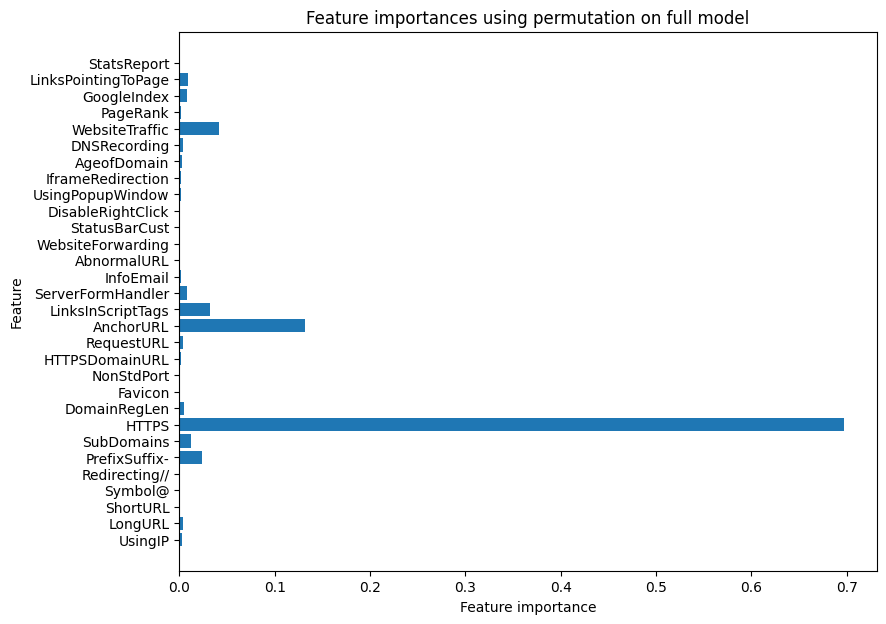

In [77]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## 7. Conclusion

1. The final conclusion on the Phishing dataset is that the some feature like "HTTTPS", "AnchorURL", "WebsiteTraffic" have more importance to classify URL is phishing URL or not. 
2. Gradient Boosting Classifier currectly classify URL upto 97.4% respective classes and hence reduces the chance of malicious attachments.
